<h2 align="right"> PH2103 Thermal Physics - Prof. Massimo Pica Ciamarra </h2> 


<h1 align="center"> One dimensional diffusion equation </h1> 


# Use of phyton
A jupyter script is a sequence of many cells. In our script, some cells contain text, as this one, other contain code.
To execute the code contained in a cell, just click on it and the press "shift+enter". The computation done in a cell generally depends on that done on previous cells, so execute the cells one after the other.

# One dimensional heat equation


## Introduction to the numerical technique
Using this scriopt you can explore the one dimensional diffusion equation
$$ \frac{dT}{dt}= D \frac{d^2T}{dx^2} $$

We solve this equation numerically, discretizing both space and time.

We describe a one dimensional system of length $L$ as a sequence of $N = \frac{L}{dx}$ cells of length $dx$.
Thus, instead of having the temperature as a function of the distance, $T(x)$, we will have the temperature defined on the cells, i.e at $x = 1\cdot dx, 2\cdot dx, ..., N \cdot dx$. We will store the $N$ values of the temperature in a vector Temp[1], Temp[2], ..., Temp[N].

Similarly, we evaluate the temperature profile, i.e. the value of the temperature on each of the cells, Temp[.], at discrete times $t = 0,dt,2d,\ldots$, where $dt$ is our 'integration timestep'.

To evolve the temperature profile, i.e. to get T[n,t+dt] at time $t+dt$ from $T[.,t]$ at time t, we use the diffusion equation.
Indeed, we can write $n = 2, \ldots N-1$:
$$T[n,t+dt] = = T[n,t] + \frac{dT[n,t]}{dt} \cdot dt = T[n,t] + D \frac{d^2T[n,t]}{dx^2} \cdot dt$$.

To use this equation to evaluate $T[n,t+dt]$, we have to estimate the second derivative. 
To this end, we are going to use the 2n order central approximation (see https://en.wikipedia.org/wiki/Finite_difference)

$$\frac{d^2T[n,t]}{dx^2} = \frac{T[n+1,t]-2T[n,t]+T[n-1,t]}{dx^2}$$

Accordingly, given $T[n,t]$ we can evaluate $T[n,t+dt]$, and iterating the temperature at all times.
$$T[n,t+dt] = T[n,t] + D \frac{T[n+1,t]-2T[n,t]+T[n-1,t]}{dx^2} \cdot dt = T[n,t] + dTdt[n,t] \cdot dt$$

When evaluating the above expression numerically, we define another vector, which stores the temperature changes, as in the above equation. 

To save memory, we are not going to store the value of the temperature at all times. We will therefore only use a vector T{N}, and keep track of the elapsed time.
Thus the solution algorithm is a simple loop:

<ol>
<li>Evaluate: $dTdt[n] = \frac{T[n]-2T[n]+T[n-1]}{dx^2}$</li>
<li>Update the temperature: $T[n] = T[n] + dTdt[n] \cdot dt$</li>
<li>Increment the time: $t_{elapsed} = t_{elapsed} + dt$</li>
</ol>

As a final note, this jupyter notebook contains two part. In the first one we consider D to be constant in space. This is good to model, for instance, how temperature varies within a given object. In the second one, we consider D to depend on space. In this case, we model in a simple way the cooling of coffee within a cup.

## Boundary conditions
The above equation is valid for $n > 1$ and for $n < N$. Indeed, since we have a system with $N$ cells, we cannot refer to cell $n = 0$ or to cell $n = N+1$. Physically, this corresponds to the fact that the cells the extreme of the system exchange heat with a cell of the system, and with the environment. The evolution of the cell at the boundary need therefore to be described also considering their interaction with the environment. 

Here, for simplicity sake, we assume these cells to act as thermal baths, i.e. we are going to keep constant both T[1] and T[N].

## Initial condition
As initial condition, we need to specify the temperature on each of the $N$ cells. We can do this as we want. However, notice that the algorithm involves the computation of spatial derivatives. Accordingly, to have numerical instabilities it is convenient for T[n] to smoothly depend on $n$.

In [59]:

#This cells execute some "service" commands, to give to the notebook some analytical and graphical abilities.
# Execute this cell - no need to look at the details
%matplotlib notebook
# get plots directly in notebook
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

## Model parameters
The physical system we will consider is a rod of length $L$, and thermal diffusivity $D$. We also need to specify the material. The only material property entering into the diffusion equation is the diffusion coefficient, or thermal diffusivity. You can find typical values for different materials here: https://en.wikipedia.org/wiki/Thermal_diffusivity

To discretize the system, we need to define the number of cells $N$, or equivalently $dx = L/N$, and the integration timestep, $dt$.

Here we fix $D = 1$, $L = 1000$, and $dx = 1$, so that $N = 1000$. We also set $dt = 0.001$.
We also defined a variable to keep track of the elapsed time.

In [90]:
"Model parameters"
D = 1
L = 1000

"Discretization"
dx = 1
N = int(L/dx)
dt = 0.1
#this is the vector storing the values of the temperature
Temp = np.empty(N)
#this is the vector storing the time derivative of the temperature
DTdt = np.empty(N)

"Other variables"
#end simulation time
end_time = 5000
#time simulated so far
elapsed_time = 0
# we want to plot ncurves at regular time intervales
ncurves = 10
# time elapsed between plots
time_between_plots = end_time/ncurves
# number of integration loops between plot
num_integration_loops = int(time_between_plots/dt)

## Initialization
Before solving the equation, we need to specify the initial condition, i.e. the initial value of $T[n]$.
You can play with this part.Few examples in the cell below. Uncomment the one you want to try, or write your own initial condition. 

Only warning: we are going to compute the second derivative of this object. If your initial condition has very large second derivatives, then in order to correctly solve the equation you need to use a very small $dt$.

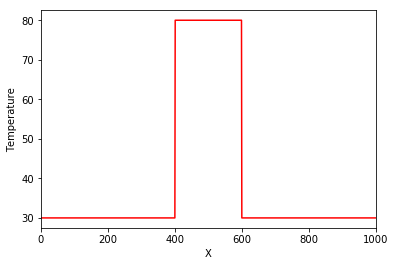

In [97]:
#ambient temperature (Celsius)
Tambient = 30
TMax=80

# use '#' to comment in an appropriate way

######################### intial condition is a Gaussian centered in L/2, with maximum temperature Tmax ##########
#for i in range(1,N):
#    Temp[i]= Tambient+(TMax-Tambient)*np.exp( -(i-N/2)**2/(2*40**2) )

######################### a central fraction of the system has a constant temperature, Tmax=80, the rest has ambient T
for i in range(1,N):
    Temp[int(N/2)-i]= Tambient

fraction = 0.2
T0 = 1
for i in range(0, int(N*fraction*0.5)):
    Temp[int(N/2)-i]= TMax
    Temp[int(N/2)+i]= TMax
    
'Here we plot to intial condition, to check that everything is as expected'
plt.figure()
plt.xlim(0,1000)
plt.xlabel('X')
plt.ylabel('Temperature')

plt.plot(Temp,'r-')

Temperature profile at time  500.0 1 10
Temperature profile at time  1000.0 2 10
Temperature profile at time  1500.0000000000002 3 10
Temperature profile at time  2000.0 4 10
Temperature profile at time  2500.0 5 10
Temperature profile at time  3000.0000000000005 6 10
Temperature profile at time  3500.0000000000005 7 10
Temperature profile at time  4000.0 8 10
Temperature profile at time  4500.0 9 10


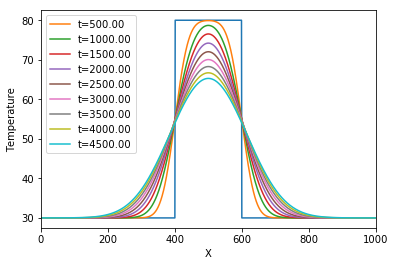

In [98]:
plt.figure()
plt.xlim(0,1000)
plt.xlabel('X')
plt.ylabel('Temperature')
plt.plot(Temp) 
elapsed_time = 0
for curve in range(1,ncurves):
    #we integrate time time between two consecuive plots
    for step in range (1,num_integration_loops):
        #compute the derivative of the temperature
        for n in range(2,N-1):
            DTdt[n] = D*(Temp[n+1]-2*Temp[n]+Temp[n-1])/(dx*dx)
        # update the temperature
        for n in range(2,N-1):
            Temp[n] = Temp[n]+DTdt[n]*dt
        #advance time
        elapsed_time = elapsed_time+dt 
    print("Temperature profile at time ", curve*dt*num_integration_loops, curve, ncurves )
    plt.plot(Temp,label='t=%1.2f' %(curve*dt*num_integration_loops)) 
    plt.legend(loc='upper left')
    


We now study the cooling of a one-dimensional coffe cup, to reproduce the experiment we have done in class. 
In this case we have three materials: air outside of the cup, the cup, the how water inside. 
In our equation, this means that we have three different values of D. We use three different values for the thermal diffusivity of water, cup and air.

We also need to specify the size of the cup.
We assume that the cup extends from 380*dx to 399*dxm and from 601*dx to 620*dx, the water from 400 to 600, and the air outside.


In [115]:
Diffusivity = np.empty(N)
Dwater=2
Dcup=0.5
Dair=0.01

for i in range(1, 379):
    Diffusivity[i]=Dair
for i in range(380, 399):
    Diffusivity[i]=Dcup
for i in range(400, 600):
    Diffusivity[i]=Dwater
for i in range(601, 620):
    Diffusivity[i]=Dcup
for i in range(621, 1000):
    Diffusivity[i]=Dair

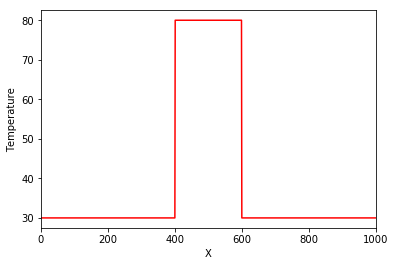

In [116]:
#as initial condition, we assume the water to have a constant hot temperature, all the resto to be at ambient temperatur
#ambient temperature (Celsius)
Tambient = 30
TMax=80

######################### a central fraction of the system has a constant temperature, Tmax=80, the rest has ambient T
for i in range(1,N):
    Temp[int(N/2)-i]= Tambient

fraction = 0.2
T0 = 1
for i in range(0, int(N*fraction*0.5)):
    Temp[int(N/2)-i]= TMax
    Temp[int(N/2)+i]= TMax
    
'Here we plot to intial condition, to check that everything is as expected'
plt.figure()
plt.xlim(0,1000)
plt.xlabel('X')
plt.ylabel('Temperature')

plt.plot(Temp,'r-')

Temperature profile at time  500.0 1 10
Temperature profile at time  1000.0 2 10
Temperature profile at time  1500.0000000000002 3 10
Temperature profile at time  2000.0 4 10
Temperature profile at time  2500.0 5 10
Temperature profile at time  3000.0000000000005 6 10
Temperature profile at time  3500.0000000000005 7 10
Temperature profile at time  4000.0 8 10
Temperature profile at time  4500.0 9 10


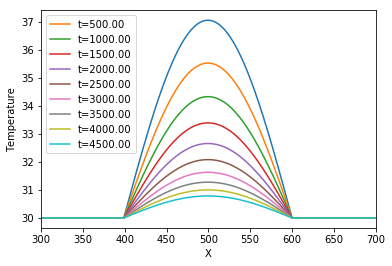

In [118]:
#the solution of the equation is as before, we just use a D dependent on space
plt.figure()
plt.xlim(0,1000)
plt.xlabel('X')
plt.ylabel('Temperature')
plt.xlim(300,700)
plt.plot(Temp) 
elapsed_time = 0
for curve in range(1,ncurves):
    #we integrate time time between two consecuive plots
    for step in range (1,num_integration_loops):
        #compute the derivative of the temperature
        for n in range(2,N-1):
            DTdt[n] = Diffusivity[n]*(Temp[n+1]-2*Temp[n]+Temp[n-1])/(dx*dx)
        # update the temperature
        for n in range(2,N-1):
            Temp[n] = Temp[n]+DTdt[n]*dt
        #advance time
        elapsed_time = elapsed_time+dt 
    print("Temperature profile at time ", curve*dt*num_integration_loops, curve, ncurves )
    plt.plot(Temp,label='t=%1.2f' %(curve*dt*num_integration_loops)) 
    plt.legend(loc='upper left')